In [ ]:
# Setup blok: imports

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# nu voeg ik deze code toe als test 

TEST MARTIN

# Zorgkosten per gemeente

Dit is een opdracht waarbij je de zorgkosten per gemeente gaat visualiseren en analyseren. We gebruiken hiervoor een dataset van Vektis met informatie over verschillende soorten zorgkosten per gemeente in Nederland.

Het duurt erg lang voordat een jaar aan zorgdata compleet is, o.a. vanwege langlopende zorgtrajecten. Daarom is de meest recente dataset van 2023.

In [ ]:
# Download data from csv file at https://www.vektis.nl/uploads/Docs%20per%20pagina/Open%20Data%20Bestanden/2023/Vektis%20Open%20Databestand%20Zorgverzekeringswet%202023%20-%20gemeente.csv

url = "https://www.vektis.nl/uploads/Docs%20per%20pagina/Open%20Data%20Bestanden/2023/Vektis%20Open%20Databestand%20Zorgverzekeringswet%202023%20-%20gemeente.csv"
import pandas as pd
data = pd.read_csv(url, encoding="latin-1", sep=";")
data.head()


,geslacht,leeftijdsklasse,gemeentenaam,aantal_bsn,aantal_verzekerdejaren,kosten_medisch_specialistische_z,kosten_farmacie,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,...,kosten_geriatrische_revalidatiez,kosten_eerstelijnsverblijf,kosten_verpleging_en_verzorging,kosten_gzsp,kosten_integrale_geboortezorg,kosten_innovatiegelden_ggz,kosten_overig,kosten_consulten_ggz,kosten_intramuraal_verblijf_ggz,kosten_overige_prestaties_ggz
0,V,5 t/m 9 jaar,AMERSFOORT,4361,4331.92,1993077.92,321453.33,324320.16,112567.49,90834.26,...,0.0,0.0,308714.33,0.0,0.0,0.0,222796.62,0.0,0.0,0.0
1,V,10 t/m 14 jaar,OOST GELRE,749,742.98,212622.21,36365.89,55490.34,17453.58,9359.63,...,0.0,0.0,0.00,0.0,0.0,0.0,9088.73,0.0,0.0,0.0
2,V,10 t/m 14 jaar,OOSTERHOUT,1498,1487.53,598245.35,82667.47,113762.71,39852.67,25524.37,...,0.0,0.0,6577.83,0.0,0.0,0.0,27837.98,0.0,0.0,0.0
3,V,10 t/m 14 jaar,OOSTSTELLINGWERF,647,643.94,296500.62,38004.44,48648.18,16924.25,13611.31,...,0.0,0.0,1306.40,0.0,0.0,0.0,6293.08,0.0,0.0,0.0
4,V,10 t/m 14 jaar,OOSTZAAN,245,244.07,63902.89,8518.97,18259.37,6162.90,4042.80,...,0.0,0.0,0.00,0.0,0.0,0.0,3284.54,0.0,0.0,0.0


In [ ]:

# subset de data tot alleen de kolommen "aantal_bsn", "gemeentenaam" en "kosten_medisch_specialistische_z" en deel "kosten_medisch_specialistische_z" door "aantal_bsn" om de kosten per persoon te krijgen. 
msz_kosten_pp = data[["aantal_bsn", "gemeentenaam", "kosten_medisch_specialistische_z"]]
msz_kosten_pp["kosten_per_persoon"] = msz_kosten_pp["kosten_medisch_specialistische_z"] / msz_kosten_pp["aantal_bsn"]
msz_kosten_pp.head()



/var/folders/tr/xtqmc5p57573pskz_pxdmm6m0000gn/T/ipykernel_6857/706231422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msz_kosten_pp["kosten_per_persoon"] = msz_kosten_pp["kosten_medisch_specialistische_z"] / msz_kosten_pp["aantal_bsn"]


,aantal_bsn,gemeentenaam,kosten_medisch_specialistische_z,kosten_per_persoon
0,4361,AMERSFOORT,1993077.92,457.023141
1,749,OOST GELRE,212622.21,283.874780
2,1498,OOSTERHOUT,598245.35,399.362717
3,647,OOSTSTELLINGWERF,296500.62,458.269892
4,245,OOSTZAAN,63902.89,260.828122


In [ ]:
# Visualiseer de kosten per persoon voor medisch specialistische zorg per gemeente in een choropleth map. 
# Welke gemeenten hebben de hoogste kosten?

import matplotlib.pyplot as plt
import geopandas as gpd

# Laad de geoJSON file met de grenzen van de gemeenten in Nederland in 2023
url = "https://cartomap.github.io/nl/wgs84/gemeente_2023.geojson"
gdf = gpd.read_file(url)
# Maak statnaam uppercase
gdf["statnaam"] = gdf["statnaam"].str.upper()


# Voeg de data toe aan de geodataframe
merged = gdf.merge(msz_kosten_pp, left_on="statnaam", right_on="gemeentenaam", how="left")

merged.head()

,statcode,jrstatcode,statnaam,rubriek,id,FID,geometry,aantal_bsn,gemeentenaam,kosten_medisch_specialistische_z,kosten_per_persoon
0,GM0014,2023GM0014,GRONINGEN,gemeente,1,gemeente_gegeneraliseerd.8eb99664-047e-4a57-b5...,"POLYGON ((6.773 53.283, 6.765 53.298, 6.738 53...",5748.0,GRONINGEN,7204193.24,1253.339116
1,GM0014,2023GM0014,GRONINGEN,gemeente,1,gemeente_gegeneraliseerd.8eb99664-047e-4a57-b5...,"POLYGON ((6.773 53.283, 6.765 53.298, 6.738 53...",6854.0,GRONINGEN,8721890.75,1272.525642
2,GM0014,2023GM0014,GRONINGEN,gemeente,1,gemeente_gegeneraliseerd.8eb99664-047e-4a57-b5...,"POLYGON ((6.773 53.283, 6.765 53.298, 6.738 53...",5087.0,GRONINGEN,16078731.59,3160.749281
3,GM0014,2023GM0014,GRONINGEN,gemeente,1,gemeente_gegeneraliseerd.8eb99664-047e-4a57-b5...,"POLYGON ((6.773 53.283, 6.765 53.298, 6.738 53...",9794.0,GRONINGEN,5141982.43,525.013522
4,GM0014,2023GM0014,GRONINGEN,gemeente,1,gemeente_gegeneraliseerd.8eb99664-047e-4a57-b5...,"POLYGON ((6.773 53.283, 6.765 53.298, 6.738 53...",4316.0,GRONINGEN,14530286.23,3366.609414


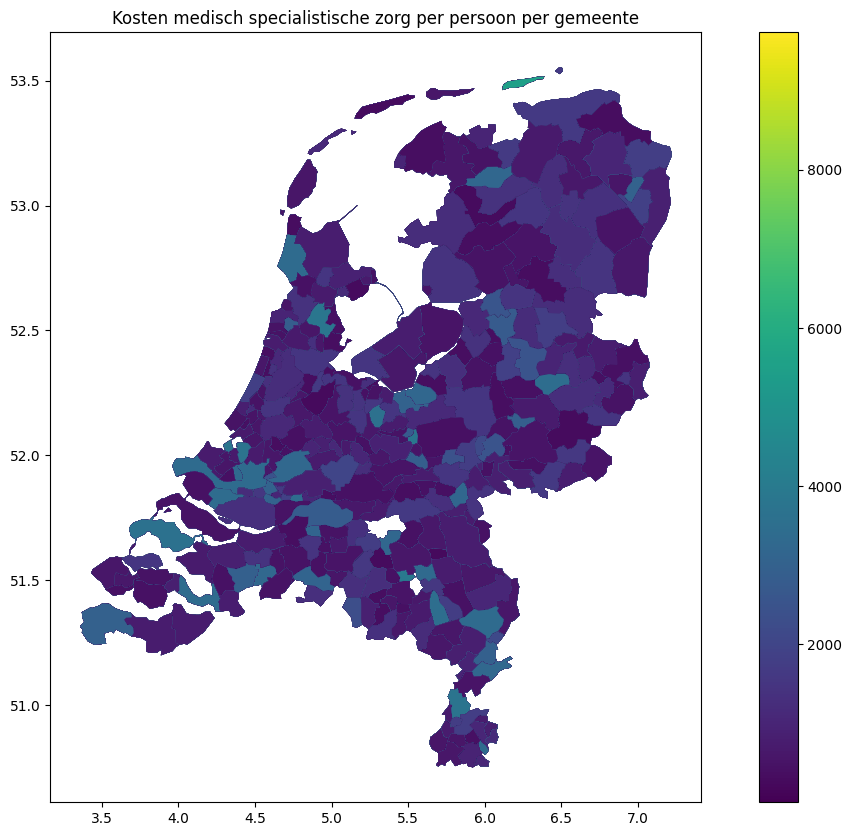

In [ ]:



# Visualiseer de choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column="kosten_per_persoon", ax=ax, legend=True)
plt.title("Kosten medisch specialistische zorg per persoon per gemeente")
plt.show()


In [30]:
# Vind de gemeenten met de hoogste kosten
top_gemeenten = merged.nlargest(5, "kosten_per_persoon")
print(top_gemeenten[["gemeentenaam", "kosten_per_persoon"]])

         gemeentenaam  kosten_per_persoon
5136        ZANDVOORT         9737.253779
577          VLIELAND         9173.045000
2656        ROZENDAAL         8601.385455
476   SCHIERMONNIKOOG         8524.846429
458   SCHIERMONNIKOOG         7930.530690
